<a href="https://colab.research.google.com/github/ludwigenvall/churn-prediction-dl/blob/main/03_train_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [36]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Loading data

In [37]:
# Loading the simulated data from GitHub
url = "https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/main/data/simulated_behavior1.csv"
df = pd.read_csv(url)
df.head()

df['log_len'] = df['logins_seq'].apply(len)
df['support_len'] = df['support_seq'].apply(len)
df['data_len'] = df['data_seq'].apply(len)

print("Logins length counts:\n", df['log_len'].value_counts())
print("Support length counts:\n", df['support_len'].value_counts())
print("Data length counts:\n", df['data_len'].value_counts())



Logins length counts:
 log_len
91    2339
90    2148
92    1513
93     692
94     258
95      61
96      20
97       1
Name: count, dtype: int64
Support length counts:
 support_len
90    7032
Name: count, dtype: int64
Data length counts:
 data_len
584    840
585    776
583    746
582    695
586    630
581    599
587    502
580    456
588    406
579    321
589    257
578    247
590    130
577    129
576     76
591     68
575     43
592     41
574     24
593     20
573     10
594      8
572      6
571      2
Name: count, dtype: int64


# Downloading baseline model and functions from scripts/lstm_model.py

In [38]:
# Download baseline LSTM model from github repo
!wget https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/main/scripts/lstm_model.py

# Import functions from the file
from lstm_model import prepare_lstm_data, build_lstm_model, compile_lstm_model

X_train, X_test, y_train, y_test = prepare_lstm_data(df)
print("X_train shape:", X_train.shape)
print("First element shape:", np.array(X_train[0]).shape)


--2025-06-02 12:35:00--  https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/main/scripts/lstm_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1701 (1.7K) [text/plain]
Saving to: ‘lstm_model.py.4’

lstm_model.py.4     100%[===================>]   1.66K  --.-KB/s    in 0s      

2025-06-02 12:35:01 (13.1 MB/s) - ‘lstm_model.py.4’ saved [1701/1701]

X_train shape: (4922, 30, 3)
First element shape: (30, 3)


# Building and training LSTM models

## Baseline model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,521 (76.25 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7296 - loss: 0.5557 - val_accuracy: 0.9015 - val_loss: 0.2767
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8909 - loss: 0.2715 - val_accuracy: 0.9096 - val_loss: 0.2506
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9017 - loss: 0.2421 - val_accuracy: 0.8721 - val_loss: 0.2784
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9042 - loss: 0.2273 - val_accuracy: 0.9178 - val_loss: 0.2001
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9115 - loss: 0.2120 - val_accuracy: 0.9066 - val_loss: 0.2102
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9109 - loss: 0.2143 - val_accuracy: 0.9096 - val_loss: 0.2222
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9167 - loss: 0.1923 - val_accuracy: 0.9147 - val_loss: 0.1919
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9105 - loss: 0.2009 - val_accuracy: 0.9249 - v

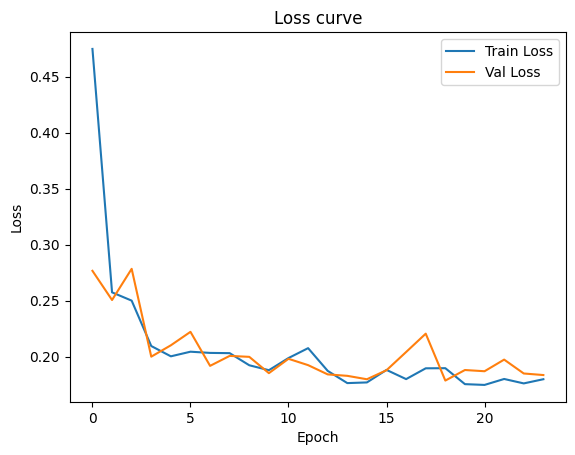

In [39]:
# Build and compile
input_shape = (X_train.shape[1], X_train.shape[2])  # (30, 3)
model = build_lstm_model(input_shape)
model = compile_lstm_model(model)
model.summary()
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()

### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

    No churn       0.96      0.96      0.96      1549
       Churn       0.89      0.89      0.89       561

    accuracy                           0.94      2110
   macro avg       0.93      0.93      0.93      2110
weighted avg       0.94      0.94      0.94      2110



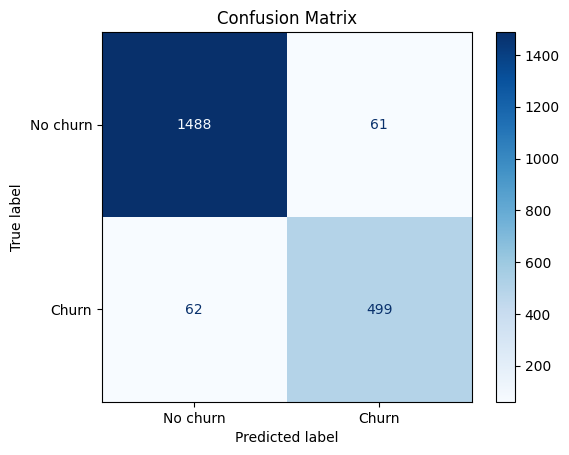

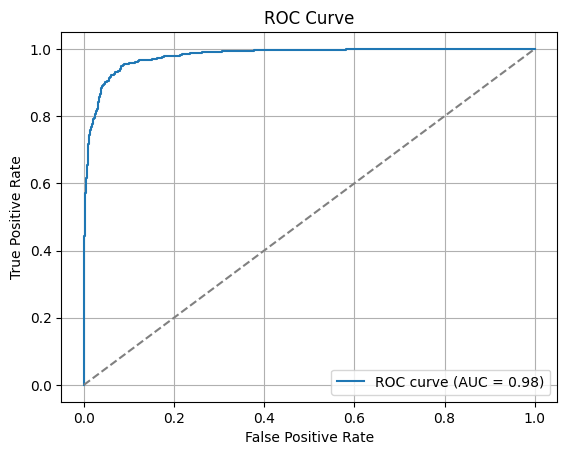

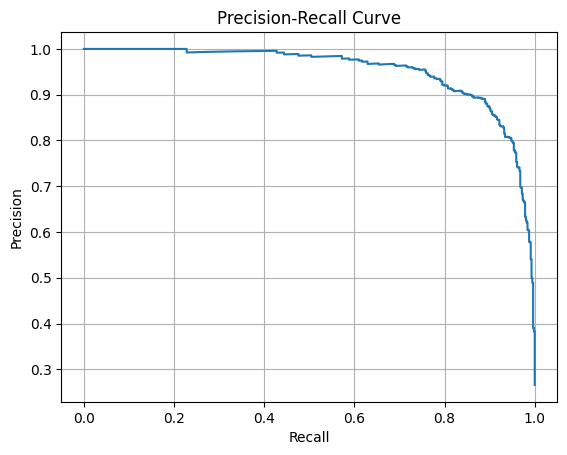

In [40]:
# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()



## Deeper model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 30, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,913 (120.75 KB)

 Trainable params: 30,913 (120.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.7555 - loss: 0.5371 - val_accuracy: 0.8701 - val_loss: 0.3372
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8853 - loss: 0.2848 - val_accuracy: 0.8721 - val_loss: 0.2807
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8886 - loss: 0.2644 - val_accuracy: 0.9005 - val_loss: 0.2151
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9108 - loss: 0.2343 - val_accuracy: 0.9025 - val_loss: 0.2516
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9053 - loss: 0.2289 - val_accuracy: 0.8995 - val_loss: 0.2310
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8898 - loss: 0.2668 - val_accuracy: 0.9198 - val_loss: 0.1994
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9194 - loss: 0.2000 - val_accuracy: 0.9218 - val_loss: 0.1925
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9115 - loss: 0.2147 - val_accuracy: 0.9228 - v

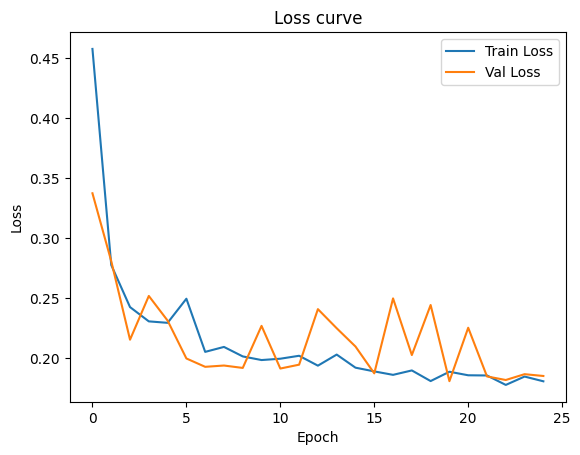

In [41]:


model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 3)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)
model.summary()
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()

### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

    No churn       0.95      0.96      0.96      1549
       Churn       0.90      0.86      0.88       561

    accuracy                           0.94      2110
   macro avg       0.92      0.91      0.92      2110
weighted avg       0.94      0.94      0.94      2110



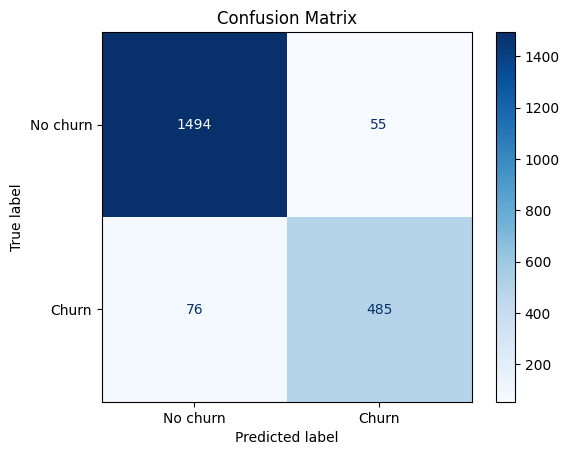

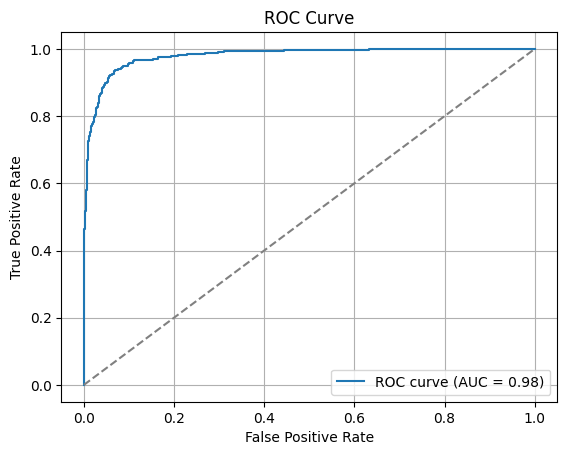

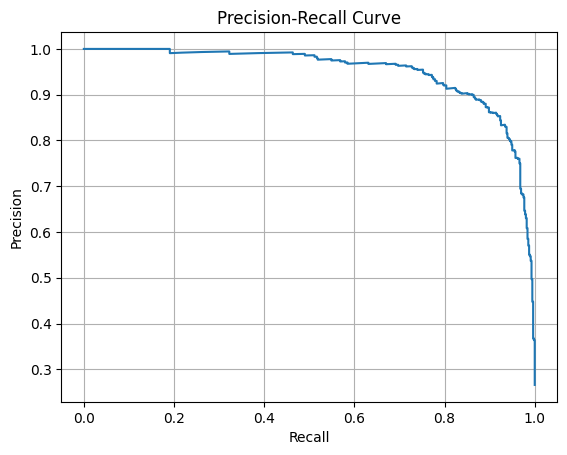

In [42]:
# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()



## Bidirectional LSTM-model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 30, 128)        │        34,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,513 (220.75 KB)

 Trainable params: 56,513 (220.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.7111 - loss: 0.5526 - val_accuracy: 0.7909 - val_loss: 0.4245
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8783 - loss: 0.3003 - val_accuracy: 0.8863 - val_loss: 0.2712
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8987 - loss: 0.2361 - val_accuracy: 0.9096 - val_loss: 0.2155
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9113 - loss: 0.2060 - val_accuracy: 0.9076 - val_loss: 0.2126
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9055 - loss: 0.2182 - val_accuracy: 0.9056 - val_loss: 0.2228
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9218 - loss: 0.2150 - val_accuracy: 0.9198 - val_loss: 0.1883
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9200 - loss: 0.1893 - val_accuracy: 0.9228 - val_loss: 0.1935
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9177 - loss: 0.1971 - val_accuracy: 0.9198 - 

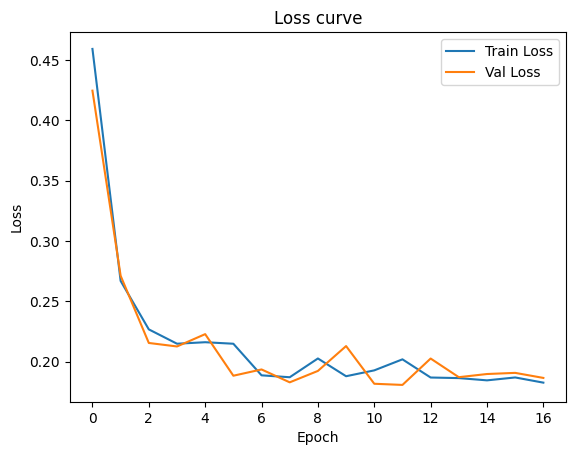

In [43]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(30, 3)),
    Dropout(0.3),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()

### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
              precision    recall  f1-score   support

    No churn       0.95      0.96      0.96      1549
       Churn       0.88      0.88      0.88       561

    accuracy                           0.94      2110
   macro avg       0.92      0.92      0.92      2110
weighted avg       0.94      0.94      0.94      2110



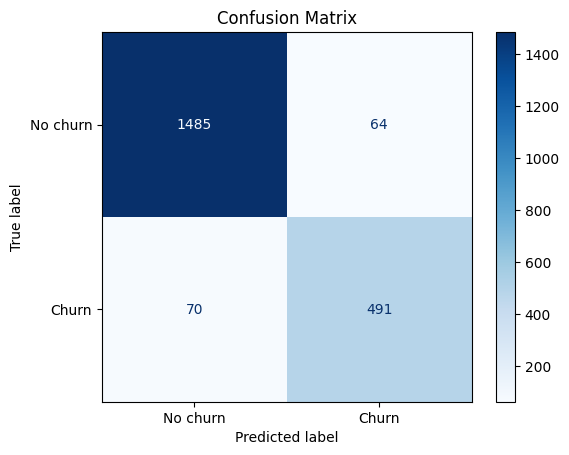

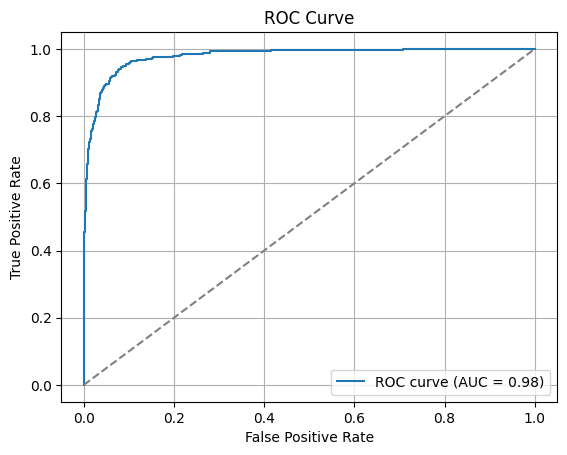

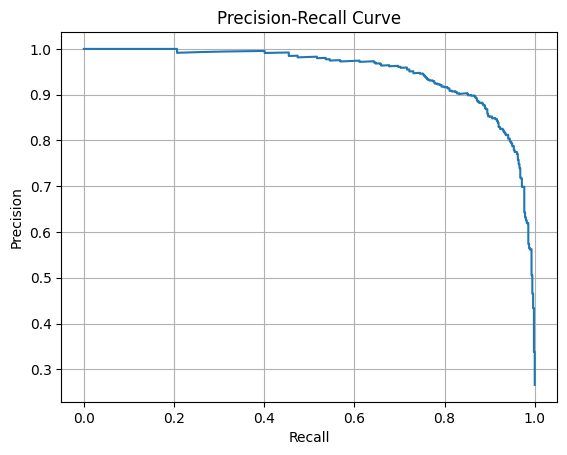

In [44]:
# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()



## Conv1D & MaxPooling1D

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,265 (106.50 KB)

 Trainable params: 27,265 (106.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7481 - loss: 0.5364 - val_accuracy: 0.8305 - val_loss: 0.3559
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8609 - loss: 0.3143 - val_accuracy: 0.8843 - val_loss: 0.2573
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8980 - loss: 0.2573 - val_accuracy: 0.8964 - val_loss: 0.2395
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9026 - loss: 0.2450 - val_accuracy: 0.9025 - val_loss: 0.2338
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9062 - loss: 0.2321 - val_accuracy: 0.9025 - val_loss: 0.2328
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9053 - loss: 0.2263 - val_accuracy: 0.9076 - val_loss: 0.2182
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8931 - loss: 0.2555 - val_accuracy: 0.9046 - val_loss: 0.2152
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9101 - loss: 0.2059 - val_accuracy: 0.9056 - v

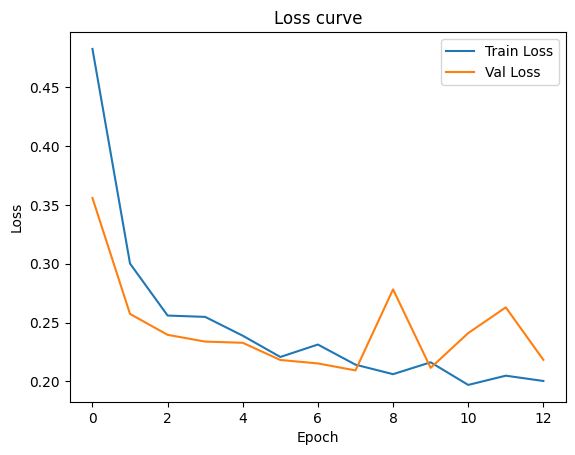

In [45]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 3)),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()


### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

    No churn       0.95      0.95      0.95      1549
       Churn       0.85      0.87      0.86       561

    accuracy                           0.93      2110
   macro avg       0.90      0.91      0.91      2110
weighted avg       0.93      0.93      0.93      2110



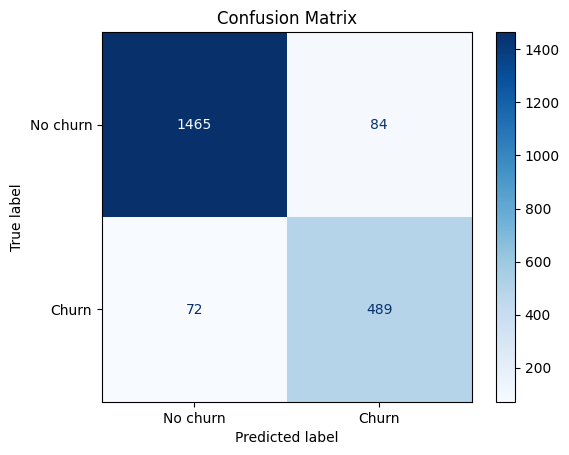

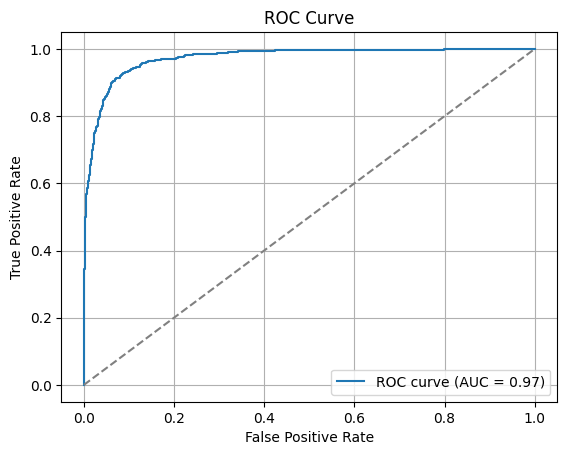

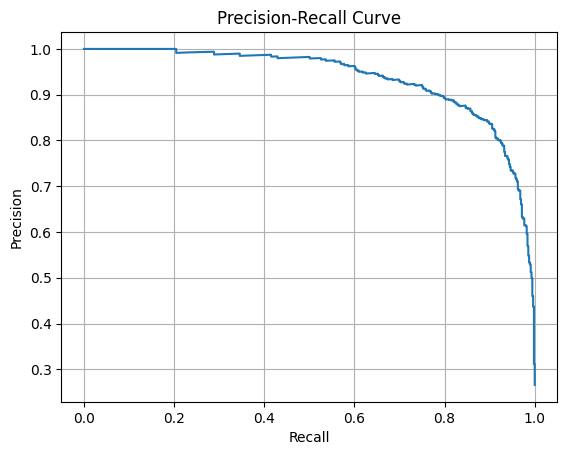

In [46]:
# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()



## LSTM with TimeDistributed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 30, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 30, 32)         │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,841 (108.75 KB)

 Trainable params: 27,841 (108.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7412 - loss: 0.5292 - val_accuracy: 0.8579 - val_loss: 0.3203
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8860 - loss: 0.2823 - val_accuracy: 0.8904 - val_loss: 0.2386
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9017 - loss: 0.2415 - val_accuracy: 0.9096 - val_loss: 0.2278
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9079 - loss: 0.2194 - val_accuracy: 0.8934 - val_loss: 0.2836
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9087 - loss: 0.2174 - val_accuracy: 0.9107 - val_loss: 0.2074
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9167 - loss: 0.2006 - val_accuracy: 0.9036 - val_loss: 0.2049
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9129 - loss: 0.2029 - val_accuracy: 0.9198 - val_loss: 0.2026
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9160 - loss: 0.2035 - val_accuracy: 0.9188 - 

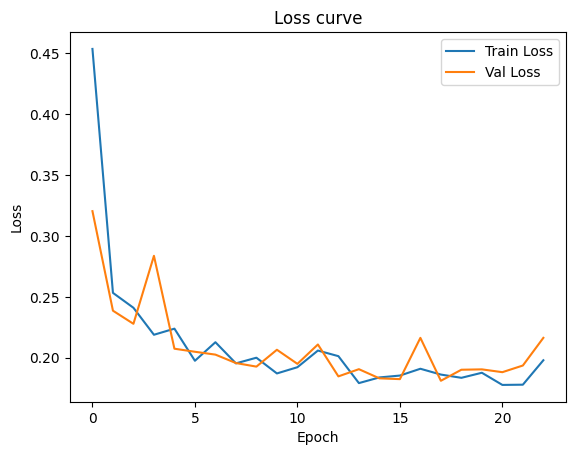

In [47]:
from tensorflow.keras.layers import TimeDistributed

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 3)),
    TimeDistributed(Dense(32, activation='relu')),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()

### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
              precision    recall  f1-score   support

    No churn       0.95      0.96      0.96      1549
       Churn       0.90      0.86      0.88       561

    accuracy                           0.94      2110
   macro avg       0.92      0.91      0.92      2110
weighted avg       0.94      0.94      0.94      2110



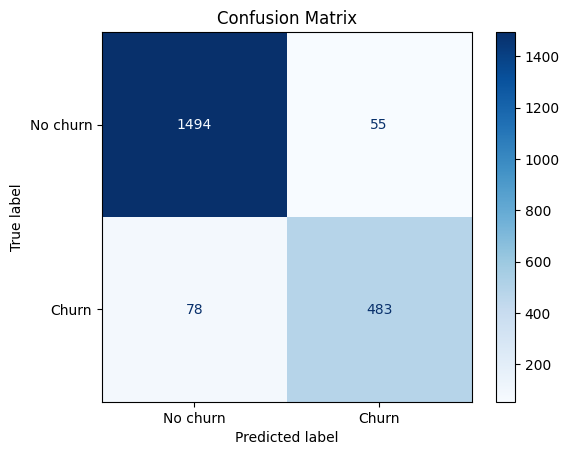

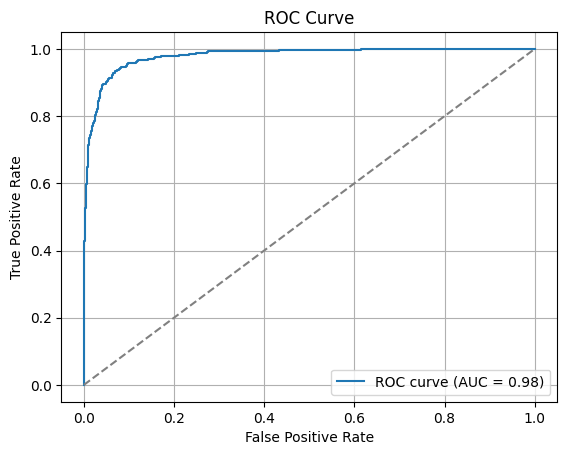

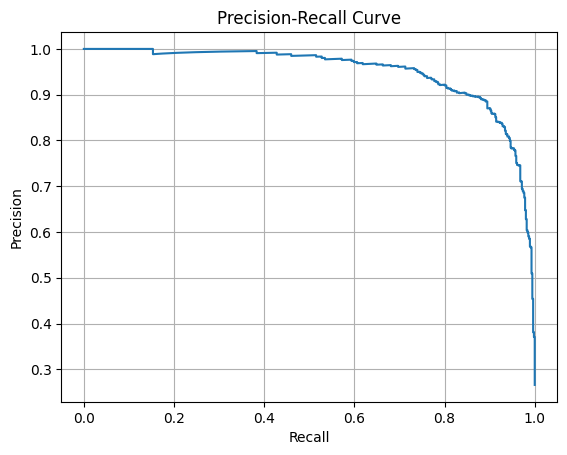

In [48]:
# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()



## LSTM and 2TimeDistributed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 30, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 30, 64)         │         4,160 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 30, 32)         │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,001 (125.00 KB)

 Trainable params: 32,001 (125.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.7508 - loss: 0.5337 - val_accuracy: 0.8751 - val_loss: 0.2974
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8653 - loss: 0.3170 - val_accuracy: 0.8883 - val_loss: 0.2427
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8958 - loss: 0.2458 - val_accuracy: 0.9056 - val_loss: 0.2139
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8932 - loss: 0.2531 - val_accuracy: 0.9076 - val_loss: 0.2083
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9125 - loss: 0.2038 - val_accuracy: 0.9188 - val_loss: 0.1982
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9188 - loss: 0.2063 - val_accuracy: 0.9198 - val_loss: 0.1965
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9139 - loss: 0.2081 - val_accuracy: 0.9066 - val_loss: 0.2206
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9200 - loss: 0.2014 - val_accuracy: 0.9137 - 

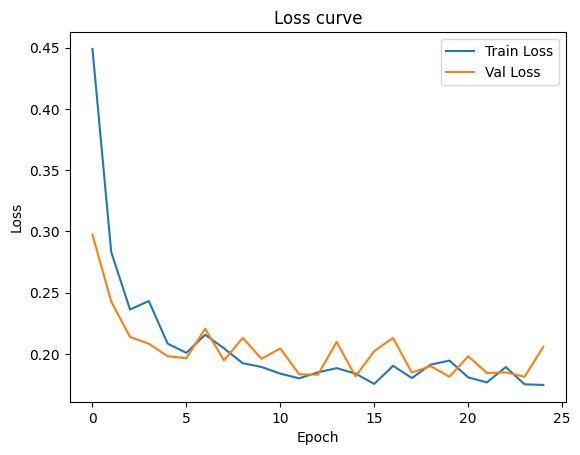

In [49]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 3)),
    TimeDistributed(Dense(64, activation='relu')),
    TimeDistributed(Dense(32, activation='relu')),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()

### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
              precision    recall  f1-score   support

    No churn       0.96      0.95      0.96      1549
       Churn       0.87      0.89      0.88       561

    accuracy                           0.94      2110
   macro avg       0.92      0.92      0.92      2110
weighted avg       0.94      0.94      0.94      2110



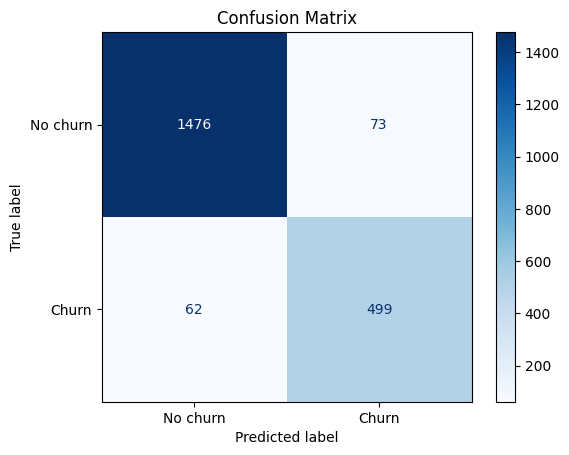

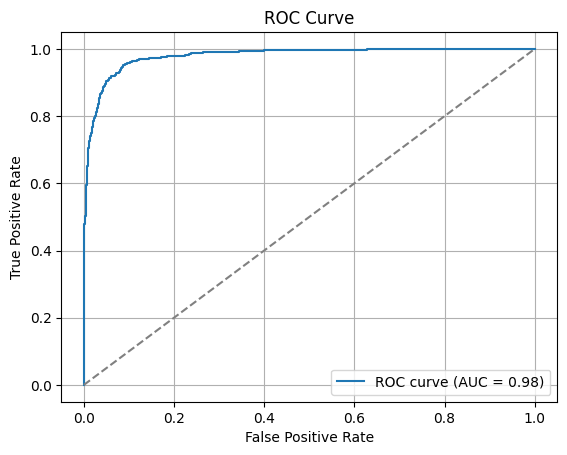

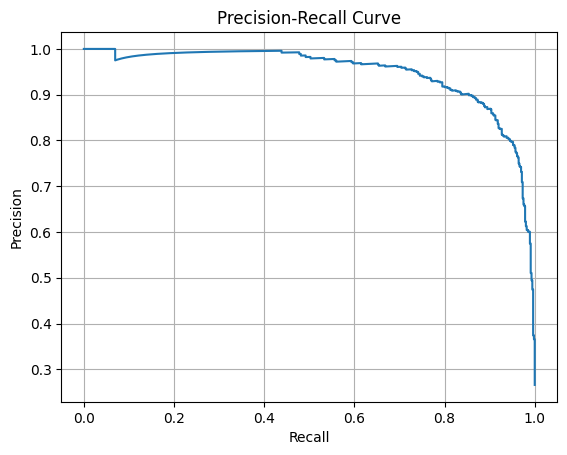

In [50]:


# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


## LSTM with TimeDistributed and l2-regulizer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                  │ (None, 30, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 30, 32)         │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,841 (108.75 KB)

 Trainable params: 27,841 (108.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7555 - loss: 0.5760 - val_accuracy: 0.8721 - val_loss: 0.3431
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8821 - loss: 0.3211 - val_accuracy: 0.9005 - val_loss: 0.2643
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8943 - loss: 0.2934 - val_accuracy: 0.8995 - val_loss: 0.2537
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9138 - loss: 0.2389 - val_accuracy: 0.9096 - val_loss: 0.2514
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9067 - loss: 0.2391 - val_accuracy: 0.8985 - val_loss: 0.2957
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8993 - loss: 0.2592 - val_accuracy: 0.9056 - val_loss: 0.2318
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9156 - loss: 0.2171 - val_accuracy: 0.9157 - val_loss: 0.2159
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9186 - loss: 0.2199 - val_accuracy: 0.9137 - 

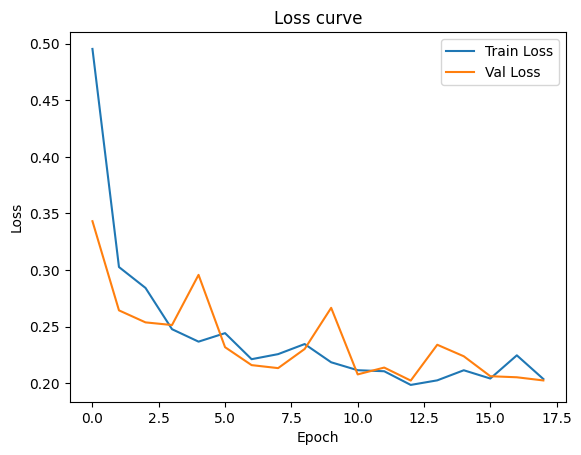

In [51]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 3)),
    TimeDistributed(Dense(32, activation='relu', kernel_regularizer=l2(0.001))),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()



### Classification Report, Confusion Matrix, ROC and Precision-Recall

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
              precision    recall  f1-score   support

    No churn       0.95      0.96      0.95      1549
       Churn       0.90      0.85      0.87       561

    accuracy                           0.93      2110
   macro avg       0.92      0.91      0.91      2110
weighted avg       0.93      0.93      0.93      2110



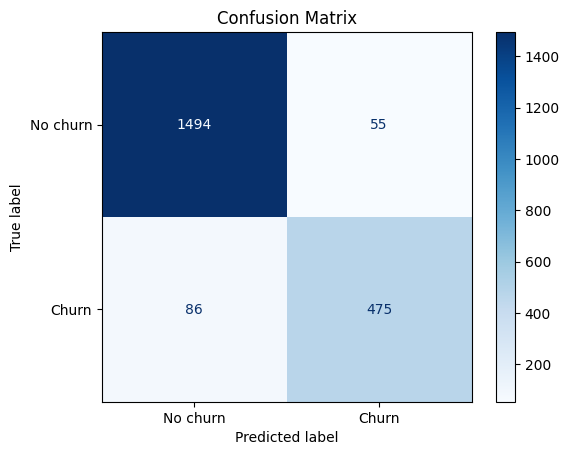

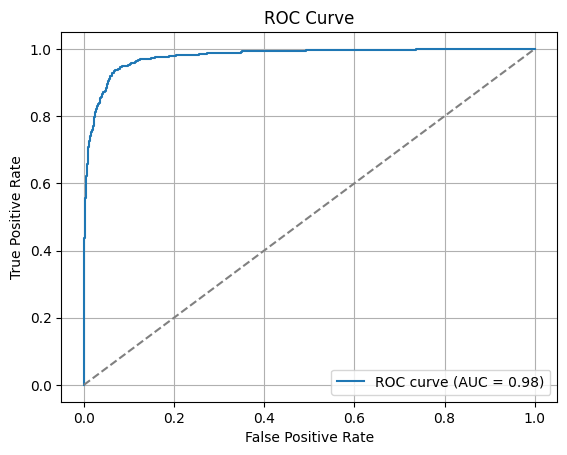

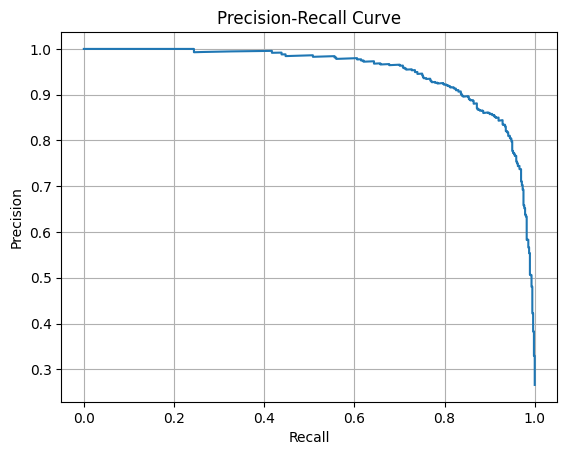

In [52]:
# Prediction (probability of churn between 0 to 1)
y_pred_prob = model.predict(X_test)

# Making binary 0/1 with 0.5 as limit
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Classification report
print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

